In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

plt.rcParams['axes.grid'] = True
#plt.rcParams['axes.grid.axis'] = 'y'
#plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1.5
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 150
plt.style.use('seaborn-v0_8')

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]


In [2]:
header_names = ["t", "S", "I", "R", "N"]

data_0point1 = pd.read_csv("SIR_data/SIR_0point1.csv", delimiter=" ", names=header_names)
data_0point5 = pd.read_csv("SIR_data/SIR_0point5.csv", delimiter=" ", names=header_names)
data_1 = pd.read_csv("SIR_data/SIR_1.csv", delimiter=" ", names=header_names)
data_10 = pd.read_csv("SIR_data/SIR_10.csv", delimiter=" ", names=header_names)
data_50 = pd.read_csv("SIR_data/SIR_50.csv", delimiter=" ", names=header_names)


data_list = [data_0point1, data_0point5, data_1, data_10, data_50]
dt_list = [0.1, 0.5, 1, 10, 50]


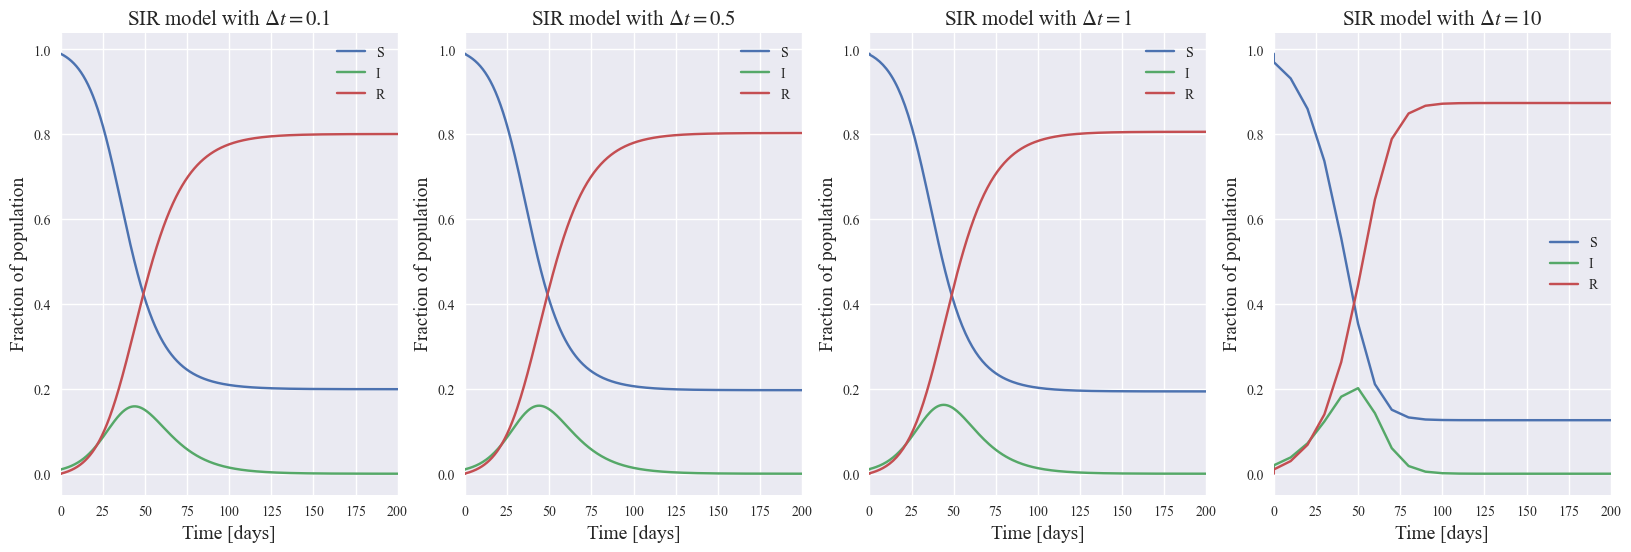

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6), dpi=100)
for i in range(4):
    for j in range(3):
        ax[i].plot(data_list[i]["t"], data_list[i][header_names[j+1]], label=header_names[j+1])
    ax[i].set_title(r"SIR model with $\Delta t = {}$".format(dt_list[i]), fontsize=15)

for axi in ax.flatten():
    axi.set_xlabel("Time [days]", fontsize=14)
    axi.set_ylabel("Fraction of population", fontsize=14)
    axi.set_xlim(0, 200)
    axi.legend()

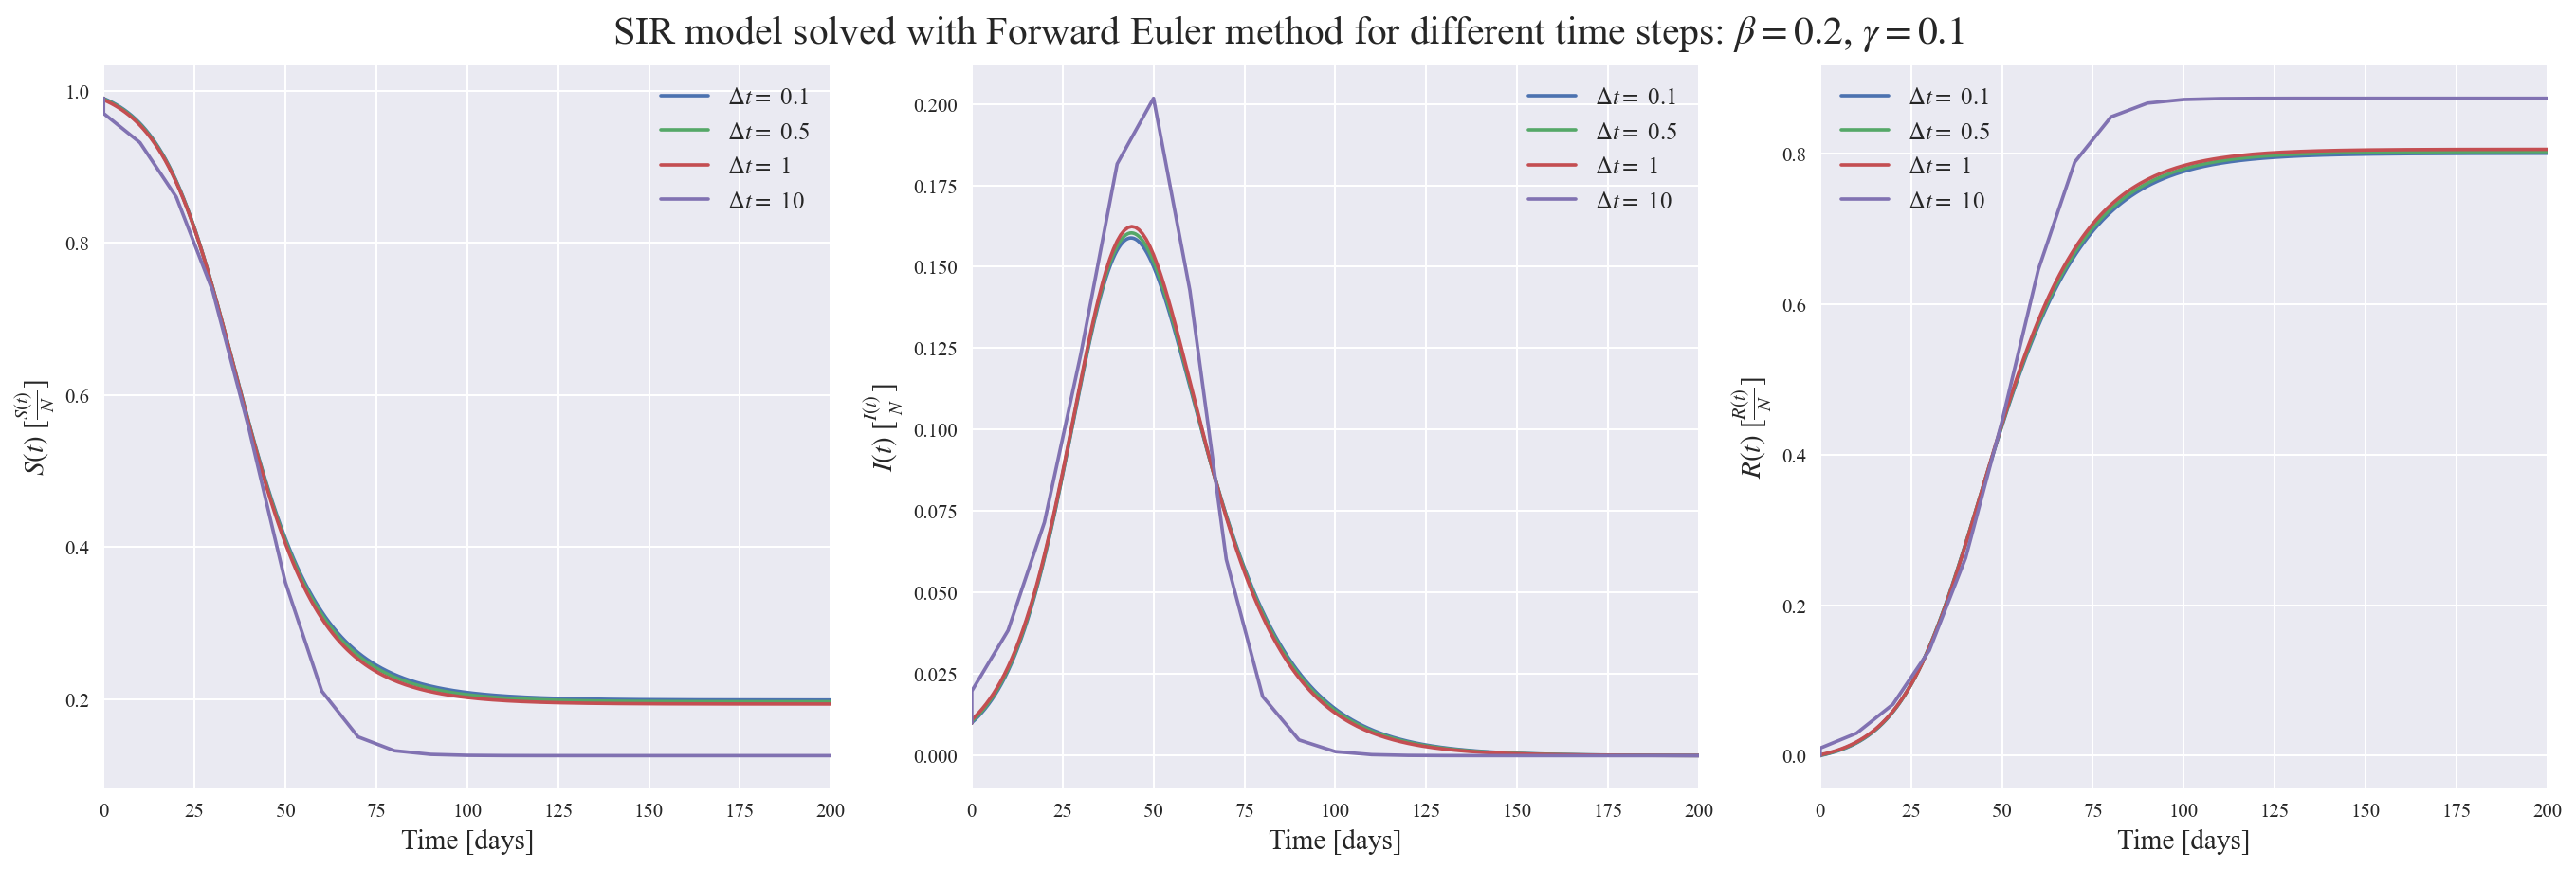

In [9]:


fig, ax = plt.subplots(1,3, figsize=(18,6), constrained_layout=True)
for i,  data in enumerate(data_list[:-1]):
    ax[0].plot(data["t"], data["S"], label=f'$\\Delta t=$ {dt_list[i]}')
    ax[1].plot(data["t"], data["I"], label=f'$\\Delta t=$ {dt_list[i]}')
    ax[2].plot(data["t"], data["R"], label=f'$\\Delta t=$ {dt_list[i]}')

for axi in ax.flatten():
    axi.legend(fontsize=12)
    axi.set_xlabel("Time [days]", fontsize=14)
    axi.set_xlim(0,200)
ax[0].set_ylabel(r"$S(t)$ [$\frac{S(t)}{N}$]", fontsize=14)
ax[1].set_ylabel(r"$I(t)$ [$\frac{I(t)}{N}$]", fontsize=14)
ax[2].set_ylabel(r"$R(t)$ [$\frac{R(t)}{N}$]", fontsize=14)
fig.suptitle(r"SIR model solved with Forward Euler method for different time steps: $\beta =0.2$, $\gamma =0.1$", fontsize=20);

